In [74]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from numpy import ravel
from sklearn.metrics import confusion_matrix
from time import time
import numpy as np

In [36]:
rf = RandomForestClassifier(random_state=0)

In [37]:
rf

RandomForestClassifier(random_state=0)

In [38]:
parametrs = {'n_estimators': range(10,50,10),
             'max_depth': range(1,12,2),
             'min_samples_split': range(2,9,2),
             'min_samples_leaf': range(1,7)}
search = GridSearchCV(rf, parametrs, cv=3)

In [39]:
for i in range(1,10,2):
    print(i)

1
3
5
7
9


In [40]:
df = pd.read_csv("training_mush.csv")

In [41]:
df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,2,0,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,3,1,0
6089,3,2,2,0,2,1,0,1,0,1,...,6,7,0,2,1,0,7,4,0,1
6090,5,2,3,0,1,1,0,1,9,0,...,7,7,0,2,1,4,3,4,0,1
6091,3,2,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0


In [42]:
x = df.iloc[:, :-1]

In [43]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,0,3,1,5,1,0,0,9,1,...,2,3,7,0,2,1,4,3,5,0
1,2,0,4,0,5,1,0,1,10,0,...,3,7,4,0,2,1,0,7,4,0
2,2,0,3,0,2,1,0,0,7,0,...,1,0,4,0,2,1,2,1,5,1
3,0,0,3,0,5,1,1,0,2,0,...,2,7,7,0,2,2,4,7,3,1
4,2,3,3,1,5,1,0,0,10,1,...,2,3,6,0,2,1,4,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,2,0,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,3,1
6089,3,2,2,0,2,1,0,1,0,1,...,2,6,7,0,2,1,0,7,4,0
6090,5,2,3,0,1,1,0,1,9,0,...,2,7,7,0,2,1,4,3,4,0
6091,3,2,3,0,5,1,1,0,2,0,...,2,7,7,0,2,2,4,7,3,1


In [44]:
y = df.iloc[:, [-1]]

In [45]:
y
ravel(y)

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [46]:
search.fit(x,ravel(y))

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [47]:
search.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [48]:
# part 2 =========================================

<AxesSubplot:>

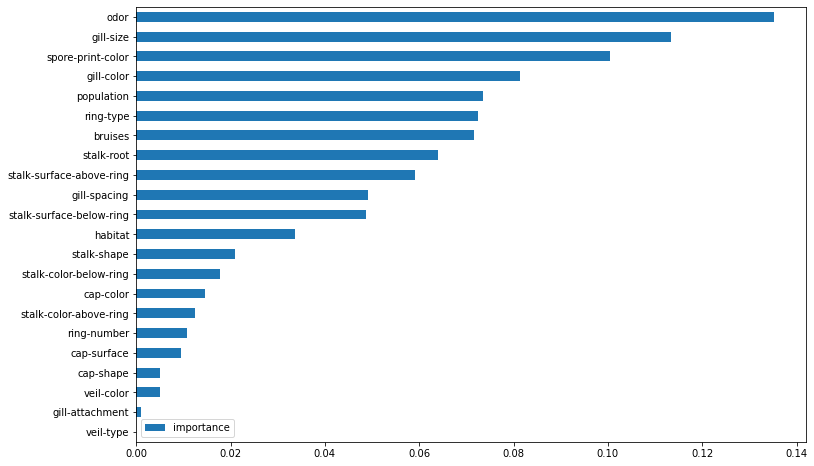

In [56]:
rf.fit(x,ravel(y))
imp = pd.DataFrame(rf.feature_importances_, x.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [57]:
x_test = pd.read_csv("testing_mush.csv")

In [58]:
x_test

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,3,3,2,0,2,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2
2027,5,2,8,1,0,1,0,0,10,0,...,2,7,7,0,2,1,4,2,2,1
2028,5,3,3,0,2,1,0,0,3,0,...,1,6,0,0,2,1,2,1,4,4
2029,5,3,3,1,5,1,0,0,9,1,...,2,3,3,0,2,1,4,3,4,0


In [65]:
y_pred = rf.predict(x_test)

In [62]:
y_test = pd.read_csv("testing_y_mush.csv")

In [63]:
y_test

,class
0,0
1,0
2,1
3,1
4,1
...,...
2026,1
2027,0
2028,1
2029,0


<AxesSubplot:>

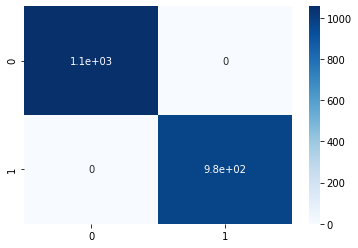

In [69]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")

In [70]:
# jump to pandas tricks ===================================

In [72]:
from time import time
before = time()
y_test.apply('mean')
after = time()
print(after - before)

0.011982917785644531


In [73]:
from time import time
before = time()
y_test.describe().loc['mean']
after = time()
print(after - before)

0.0640406608581543


In [76]:
from time import time
before = time()
y_test.mean(axis=0)
after = time()
print(after - before)

0.0009996891021728516


In [78]:
from time import time
before = time()
y_test.apply(np.mean)
after = time()
print(after - before)

0.0010001659393310547


In [79]:


df = pd.DataFrame(range(10000000))

%time df.apply(np.mean)

%time df.apply('mean')

%time df.describe().loc['mean']

%time df.mean(axis=0)


Wall time: 17.7 ms
Wall time: 12.5 ms
Wall time: 747 ms
Wall time: 22 ms


0    4999999.5
dtype: float64